# Project: Wrangle and Analyze WeRateDogs twitter data

In [117]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import time
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from IPython.display import HTML, display


# Gather

In [31]:
# Read the csv file
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [32]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [33]:
# Scrape the image predictions file from the Udacity website
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [34]:
# Load the image predictions file
images = pd.read_csv('image_predictions.tsv', sep = '\t')
images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [ ]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [35]:
# Create a dataframe with tweet ID, retweet count, and favorite count
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        
        df_list.append({
            'tweet_id': tweet['id'],
            'retweet_count': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count']
        })
df_tweet = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
       
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assess

In [36]:
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2000,672488522314567680,NaN,NaN,2015-12-03 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jackie. She was all ready to go out, b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/672488522...,10,10,Jackie,None,None,None,None
2045,671528761649688577,NaN,NaN,2015-12-01 03:18:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He's in the middle of a serious conv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671528761...,10,10,Jax,None,None,None,None
1701,680940246314430465,NaN,NaN,2015-12-27 02:36:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alice. She's an idiot. 4/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680940246...,4,10,Alice,None,None,None,None


In [37]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

In [12]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
twitter_archive['text'].value_counts()

This is Ozzy. He's acrobatic af. Legendary pupper status achieved. 13/10 https://t.co/gHWsCTu90E                                                                      1
This is Gustaf. He's a purebred Chevy Equinox. Loves to shred. Gnarly lil pup. Great with the babes. 11/10 https://t.co/7CbO2eMAgJ                                    1
RT @dog_rates: This is Gromit. He's pupset because there's no need to beware of him. Just wants a pettin. 10/10 https://t.co/eSvz4EapHH                               1
This is Atlas. Swinging is his passion. 12/10 would push all day https://t.co/9k8LLjJ0uJ                                                                              1
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV    1
                                                                                                                                                                

In [15]:
twitter_archive['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [20]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Terrenth      1
Mac           1
Odin          1
Pavlov        1
Stella        1
Name: name, Length: 957, dtype: int64

In [25]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [28]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [31]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [38]:
twitter_archive[['doggo','floofer','pupper','puppo']]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
2351,None,None,None,None
2352,None,None,None,None
2353,None,None,None,None
2354,None,None,None,None


In [39]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [36]:
df_tweet['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
794926597468000259    1
673705679337693185    1
673342308415348736    1
754482103782404096    1
700151421916807169    1
Name: tweet_id, Length: 2354, dtype: int64

In [37]:
df_tweet['favorite_count'].value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [38]:
df_tweet['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [40]:
images.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1044,712717840512598017,https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg,1,Great_Pyrenees,0.732043,True,kuvasz,0.121375,True,Irish_wolfhound,0.049524,True
343,672264251789176834,https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg,1,Chihuahua,0.609860,True,teddy,0.068134,False,Norwich_terrier,0.059227,True
1788,829861396166877184,https://pbs.twimg.com/media/C4RCiIHWYAAwgJM.jpg,1,Border_terrier,0.394486,True,Staffordshire_bullterrier,0.376574,True,American_Staffordshire_terrier,0.031292,True


In [41]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
images['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
816829038950027264    1
847971574464610304    1
713175907180089344    1
670338931251150849    1
700151421916807169    1
Name: tweet_id, Length: 2075, dtype: int64

In [42]:
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CdM2xRpXEAUsR4k.jpg                                            1
https://pbs.twimg.com/media/CUoLEG3XAAE65I0.jpg                                            1
https://pbs.twimg.com/media/C7UVuE_U0AI8GGl.jpg                                            1
https://pbs.twimg.com/ext_tw_video_thumb/751456786360725504/pu/img/hWqfIQ29A0cBv6f_.jpg    1
https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg                       

In [45]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [46]:
images['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
toilet_seat             1
carton                  1
water_buffalo           1
bonnet                  1
fire_engine             1
Name: p1, Length: 378, dtype: int64

In [47]:
images['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [48]:
images['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [49]:
images['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
pickup                  1
standard_schnauzer      1
cardigan                1
soccer_ball             1
EntleBucher             1
Name: p2, Length: 405, dtype: int64

In [50]:
images['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
           ..
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [51]:
images['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [52]:
images['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
grocery_store          1
screen                 1
parachute              1
black_swan             1
go-kart                1
Name: p3, Length: 408, dtype: int64

In [53]:
images['p3_conf'].value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
           ..
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [54]:
images['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

## Quality Issues

#### twitter_archive dataframe (NOT ALL OF THEM CLEANED)
* Data contains retweets (rows where retweeted_status_id & retweeted_status_user_id have a number instead of NaN).
* Missing data in expanded_urls (tweets with no images)
* Not all images are dog images
* text and rating_numerator column: tweets that include more than one rating and/or decimal numbers, hence, wrong or missing   data in the rating_numerator and rating_denominator column
* The data type of *rating_numerator* and *rating_denominator* columns is string, change to float.
* Dog stage's type to categorical
* timestamp are of type 'object' , tweet_id is an integer.
* name has values that are string "None" instead of NaN.
* doggo, floofer, pupper, and puppo have values that are string "None" instead of NaN.

### df_tweet dataframe
* There are 2 missing tweets compared to the twitter_archive dataframe.

### images dataframe
* There are 2356 tweets in the twitter_archive dataframe and 2075 rows in the images dataframe.  This could mean that there is missing data, or not all 2356 of the tweets had pictures.
* tweet_id is an integer.



## Tidiness Issues

* Merge three data frames.
* twitter_archive: 4 columns (dogger, floofer, pupper and puppo) for one variable (dog stage)
* Drop unneeded columns
* Combine rating_numerator and rating_denominator columns into one column

# Clean

In [42]:
# Make copies of the dataframes for cleaning

twitter_archive_clean = twitter_archive.copy()
df_tweet_clean = df_tweet.copy()
images_clean = images.copy()

#### Remove Retweets

In [43]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Missing data in expanded_urls (tweets with no images)

In [44]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

#### Merge three data frames.

In [45]:
# First, merge df_tweet_clean to twitter_archive_clean.
twitter_archive_clean = pd.merge(twitter_archive_clean, df_tweet_clean, 
                                    on = ['tweet_id'], how = 'left')

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

In [47]:
# Second, merge images_clean dataframe to the twitter_archive_clean.
twitter_archive_clean = pd.merge(twitter_archive_clean, images_clean, 
                                    on = ['tweet_id'], how = 'left')

In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

**Keep the tweets with images.**

In [50]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()]

In [89]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2116
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

**Drop the tweets with no retweet_count**

In [90]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweet_count.notnull()]

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2116
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

#### Drop unneeded columns

In [52]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id',
                              'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2116
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  retweet_count       1994 non-null   int64  
 13  favorite_count      1994 non-null   int64  
 14  jpg_url             1994 non-null   object 
 15  img_num             1994 non-null   float64
 16  p1    

#### twitter_archive: 4 columns (dogger, floofer, pupper and puppo) for one variable (dog stage)

In [54]:
twitter_archive_clean[twitter_archive_clean['text'].str.contains('floofer')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
42,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,...,1.0,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
453,800388270626521089,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,...,2.0,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
595,776218204058357768,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,...,1.0,Samoyed,0.940326,True,Pomeranian,0.055527,True,keeshond,0.002226,True


There are only 3 tweets with floofer. In the Dogtionary it is stated as 'floof' so I will take into account this.

In [55]:
twitter_archive_clean[twitter_archive_clean['text'].str.contains('floof')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
24,887101392804085760,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,...,1.0,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True
42,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,...,1.0,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
49,881906580714921986,2017-07-03 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,https://twitter.com/dog_rates/status/881906580...,12,10,Rey,None,None,...,1.0,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False
341,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,...,2.0,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
453,800388270626521089,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,...,2.0,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
473,796080075804475393,2016-11-08 20:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yogi. He's 98% floof. Snuggable af. 12...,https://twitter.com/dog_rates/status/796080075...,12,10,Yogi,None,None,...,1.0,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False
479,794332329137291264,2016-11-04 00:15:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,https://twitter.com/dog_rates/status/794332329...,12,10,Nimbus,None,None,...,1.0,Samoyed,0.988307,True,malamute,0.004906,True,Great_Pyrenees,0.002901,True
571,780543529827336192,2016-09-26 23:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a perturbed super floof. 12/10 would sn...,https://twitter.com/dog_rates/status/780543529...,12,10,None,None,None,...,1.0,golden_retriever,0.628312,True,Labrador_retriever,0.317365,True,Tibetan_mastiff,0.012260,True
595,776218204058357768,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,...,1.0,Samoyed,0.940326,True,Pomeranian,0.055527,True,keeshond,0.002226,True
609,773922284943896577,2016-09-08 16:33:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Heinrich (pronounced ""Pat""). He's a Bo...",https://twitter.com/dog_rates/status/773922284...,12,10,Heinrich,None,None,...,1.0,Pomeranian,0.554331,True,Samoyed,0.432158,True,chow,0.003199,True


In [56]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floof|pupper|puppo)',
                                                                             expand=True)
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)
twitter_archive_clean['dog_stage'].fillna('None', inplace=True)

In [57]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2116
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   retweet_count       1994 non-null   int64  
 9   favorite_count      1994 non-null   int64  
 10  jpg_url             1994 non-null   object 
 11  img_num             1994 non-null   float64
 12  p1                  1994 non-null   object 
 13  p1_conf             1994 non-null   float64
 14  p1_dog              1994 non-null   object 
 15  p2                  1994 non-null   object 
 16  p2_con

In [58]:
twitter_archive_clean['dog_stage'].sample(15)

1460    pupper
371       None
1136    pupper
1097      None
1017      None
336      doggo
1439    pupper
963       None
1109      None
1317      None
183       None
1654      None
13        None
1079      None
1816      None
Name: dog_stage, dtype: object

In [59]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


#### Not all images are dog images

In [60]:
# rating_numerator is usually greater than 10, 0 is an extreme value so tweets with numerator of 0 should be checked
twitter_archive_clean.query('rating_numerator == 0')[['text','expanded_urls']]

,text,expanded_urls
249,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...
807,"PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...


In [61]:
twitter_archive_clean = twitter_archive_clean.drop(labels=[249,807],axis=0)

In [62]:
# Test if the rows are dropped
twitter_archive_clean.query('rating_numerator == 0')[['text','expanded_urls']]

,text,expanded_urls


In case of getting an image of something else rather than dogs the following statements are written in the text: 'only rate dogs','only send in dogs','only send dogs', 'stop sending', 'without a dog','not pet', 'w/out a dog'

In [63]:
no_dogs = 'only rate dogs|only send in dogs|only send dogs|stop sending|without a dog|not pet| w/out a dog'
twitter_archive_clean[twitter_archive_clean['text'].str.contains(no_dogs)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
24,887101392804085760,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,None,6167,31061,...,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True,floof
43,883117836046086144,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13,10,None,6949,37914,...,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True,None
54,880872448815771648,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,https://twitter.com/dog_rates/status/880872448...,12,10,None,3989,21734,...,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True,None
79,875021211251597312,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys please stop sending pictures without any ...,https://twitter.com/dog_rates/status/875021211...,12,10,None,4922,26022,...,West_Highland_white_terrier,0.714319,True,Siberian_husky,0.091913,True,Great_Pyrenees,0.046038,True,None
82,874057562936811520,2017-06-12 00:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",https://twitter.com/dog_rates/status/874057562...,12,10,None,4125,23134,...,flat-coated_retriever,0.832177,True,black-and-tan_coonhound,0.040437,True,Newfoundland,0.028228,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,675878199931371520,2015-12-13 03:21:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Ok, I'll admit this is a pretty adorable bunny...",https://twitter.com/dog_rates/status/675878199...,11,10,None,1570,4531,...,wood_rabbit,0.785756,False,hare,0.118181,False,Cardigan,0.043627,True,None
1625,675534494439489536,2015-12-12 04:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys?! Only send in dogs. I only rat...,https://twitter.com/dog_rates/status/675534494...,11,10,a,470,1953,...,chow,0.749368,True,schipperke,0.133738,True,Newfoundland,0.049914,True,None
1640,675153376133427200,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,https://twitter.com/dog_rates/status/675153376...,1,10,None,2734,6072,...,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False,None
1648,675109292475830276,2015-12-11 00:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. We've been over this. We only rate...,https://twitter.com/dog_rates/status/675109292...,9,10,a,1259,3006,...,dalmatian,0.989519,True,English_setter,0.005258,True,German_short-haired_pointer,0.001443,True,None


In [64]:
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean['text'].str.contains(no_dogs)]

In [66]:
# Test
twitter_archive_clean[twitter_archive_clean['text'].str.contains(no_dogs)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


In [67]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1915 entries, 0 to 2116
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1915 non-null   int64  
 1   timestamp           1915 non-null   object 
 2   source              1915 non-null   object 
 3   text                1915 non-null   object 
 4   expanded_urls       1915 non-null   object 
 5   rating_numerator    1915 non-null   int64  
 6   rating_denominator  1915 non-null   int64  
 7   name                1915 non-null   object 
 8   retweet_count       1915 non-null   int64  
 9   favorite_count      1915 non-null   int64  
 10  jpg_url             1915 non-null   object 
 11  img_num             1915 non-null   float64
 12  p1                  1915 non-null   object 
 13  p1_conf             1915 non-null   float64
 14  p1_dog              1915 non-null   object 
 15  p2                  1915 non-null   object 
 16  p2_con

#### text and rating_numerator column: tweets that include more than one rating and/or decimal numbers, hence, wrong or missing   data in the rating_numerator and rating_denominator column

Look at the tweets with rating_numerator 1 because it is a very low rating.

In [75]:
twitter_archive_clean.query('rating_numerator == 1')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
1857,670783437142401025,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,https://twitter.com/dog_rates/status/670783437...,1,10,None,431,872,...,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False,None
2023,667549055577362432,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,2454,6138,...,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False,None
2096,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,71,152,...,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,None
2099,666104133288665088,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1,10,None,6871,14765,...,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,None


The rating in the line 2096 is incorrectly extracted and should be changed. The others are not dogs and should be dropped.

In [76]:
# Find the tweet with decimal numerator
twitter_archive_clean[twitter_archive_clean.rating_numerator==5]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
41,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,10407,46860,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,None
561,781661882474196992,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,3129,11634,...,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True,None
1184,699691744225525762,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,5174,11252,...,hippopotamus,0.982269,False,sea_lion,0.006295,False,dugong,0.005768,False,None
1288,691483041324204033,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,5,10,None,656,2608,...,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True,None
1362,687102708889812993,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,https://twitter.com/dog_rates/status/687102708...,5,10,None,1124,2571,...,fiddler_crab,0.992069,False,quail,0.002491,False,rock_crab,0.001513,False,None
1395,684959798585110529,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,3487,7004,...,llama,0.379624,False,triceratops,0.162761,False,hog,0.084251,False,None
1400,684880619965411328,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,https://twitter.com/dog_rates/status/684880619...,5,10,None,936,2305,...,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False,pupper
1421,683849932751646720,2016-01-04 03:18:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He's not the brightest dog. Ne...,https://twitter.com/dog_rates/status/683849932...,5,10,Jiminy,1116,2896,...,hog,0.458855,False,Mexican_hairless,0.164906,True,wild_boar,0.111700,False,None
1455,682003177596559360,2015-12-30 01:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Wrinkly as hell. Weird segmen...,https://twitter.com/dog_rates/status/682003177...,5,10,None,1722,3464,...,triceratops,0.249872,False,chimpanzee,0.060929,False,mask,0.050221,False,None
1501,679877062409191424,2015-12-24 04:11:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5,10,Penelope,726,2155,...,hog,0.809466,False,hay,0.060178,False,lumbermill,0.016483,False,None


In [83]:
# Look at the data whose rating_denominator is different than 10.
pd.set_option('display.max_colwidth', -1)
twitter_archive_clean[twitter_archive_clean.rating_denominator!=10].text

C:\Users\alizahran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


341     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
405     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
702     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
857     After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                             
908     Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                                
953     Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                      

- Notice 24/7 is not a rating so this tweet should be dropped.
- 50/50 and 4/20 are not the correct ratings and will be changed later.
- Some of them include two ratings.
- Some of them include more than one dog.

In [84]:
# Drop the tweet with the rating 24/7.
twitter_archive_clean = twitter_archive_clean.drop(labels=405,axis=0)

In [85]:
# Test
twitter_archive_clean[twitter_archive_clean.rating_numerator==24]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


In [92]:
# Extract the rating_numerator
numerator_new = twitter_archive_clean.text.str.extract(r'(\d+(?:\.\d+)?)\/\d+0', expand=False)

# Compare the old rating numerator and the new one (for debugging purposes).
old = list(twitter_archive_clean.rating_numerator)
text = list(twitter_archive_clean.text)
for index, rating in enumerate(numerator_new):
    rating_old = old[index]
    if str(rating) != str(rating_old):
        print(text[index])
        print("Old: " + str(rating_old) + " New: " + str(rating) + "\n")


This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
Old: 5 New: 13.5

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Old: 75 New: 9.75

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Old: 27 New: 11.27

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Old: 9 New: 14

This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Old: 7 New: 10

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
Old: 26 New: 11.26

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwoo

In [94]:
twitter_archive_clean['rating_numerator'] = numerator_new

In [95]:
# Extract the rating_denominator
denominator_new = twitter_archive_clean.text.str.extract(r'\d+(?:\.\d)?\/(\d+0)', expand=False)

# Compare the old rating denominator and the new one (for debugging purposes).
old = list(twitter_archive_clean.rating_denominator)
text = list(twitter_archive_clean.text)
for index, rating in enumerate(denominator_new):
    denominator_old = old[index]
    if str(rating) != str(denominator_old):
        print(text[index])
        print("Old: " + str(denominator_old) + " New: " + str(rating) + "\n")

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Old: 11 New: 10

This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Old: 11 New: 10

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Old: 2 New: 10



In [96]:
twitter_archive_clean['rating_denominator'] = denominator_new

Change the rating 50/50 with the correct rating 11/10, and 4/20 with 13/10

In [102]:
twitter_archive_clean.rating_numerator[990]='11'
twitter_archive_clean.rating_denominator[990]='10'
twitter_archive_clean.rating_numerator[953] = '13'
twitter_archive_clean.rating_denominator[953] = '10'

C:\Users\alizahran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\alizahran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\alizahran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel 

In [106]:
#Test
twitter_archive_clean.rating_numerator[990],twitter_archive_clean.rating_denominator[990],twitter_archive_clean.rating_numerator[953],twitter_archive_clean.rating_denominator[953]

('11', '10', '13', '10')

In [107]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 2116
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1914 non-null   int64  
 1   timestamp           1914 non-null   object 
 2   source              1914 non-null   object 
 3   text                1914 non-null   object 
 4   expanded_urls       1914 non-null   object 
 5   rating_numerator    1914 non-null   object 
 6   rating_denominator  1914 non-null   object 
 7   name                1914 non-null   object 
 8   retweet_count       1914 non-null   int64  
 9   favorite_count      1914 non-null   int64  
 10  jpg_url             1914 non-null   object 
 11  img_num             1914 non-null   float64
 12  p1                  1914 non-null   object 
 13  p1_conf             1914 non-null   float64
 14  p1_dog              1914 non-null   object 
 15  p2                  1914 non-null   object 
 16  p2_con

The data type of *rating_numerator* and *rating_denominator* columns is string, change to float.

In [108]:
twitter_archive_clean.rating_numerator =twitter_archive_clean.rating_numerator.astype(float)
twitter_archive_clean.rating_denominator =twitter_archive_clean.rating_denominator.astype(float)

Drop the lines in which the rating_numerator is 1.

In [109]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_numerator != 1.0]

In [110]:
#Test Drop
twitter_archive_clean.query('rating_numerator == 1.0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


In [111]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 0 to 2116
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1911 non-null   int64  
 1   timestamp           1911 non-null   object 
 2   source              1911 non-null   object 
 3   text                1911 non-null   object 
 4   expanded_urls       1911 non-null   object 
 5   rating_numerator    1911 non-null   float64
 6   rating_denominator  1911 non-null   float64
 7   name                1911 non-null   object 
 8   retweet_count       1911 non-null   int64  
 9   favorite_count      1911 non-null   int64  
 10  jpg_url             1911 non-null   object 
 11  img_num             1911 non-null   float64
 12  p1                  1911 non-null   object 
 13  p1_conf             1911 non-null   float64
 14  p1_dog              1911 non-null   object 
 15  p2                  1911 non-null   object 
 16  p2_con

#### Combine rating_numerator and rating_denominator columns into one column

In [112]:
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator

In [113]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 0 to 2116
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1911 non-null   int64  
 1   timestamp           1911 non-null   object 
 2   source              1911 non-null   object 
 3   text                1911 non-null   object 
 4   expanded_urls       1911 non-null   object 
 5   rating_numerator    1911 non-null   float64
 6   rating_denominator  1911 non-null   float64
 7   name                1911 non-null   object 
 8   retweet_count       1911 non-null   int64  
 9   favorite_count      1911 non-null   int64  
 10  jpg_url             1911 non-null   object 
 11  img_num             1911 non-null   float64
 12  p1                  1911 non-null   object 
 13  p1_conf             1911 non-null   float64
 14  p1_dog              1911 non-null   object 
 15  p2                  1911 non-null   object 
 16  p2_con

In [114]:
twitter_archive_clean.rating.value_counts()

1.200      440
1.000      406
1.100      384
1.300      258
0.900      139
0.800      93 
0.700      48 
1.400      35 
0.600      32 
0.500      31 
0.300      17 
0.400      13 
0.200      9  
1.350      1  
1.127      1  
1.126      1  
177.600    1  
0.975      1  
42.000     1  
Name: rating, dtype: int64

The outliers: 42 and 177.6

In [115]:
twitter_archive_clean.query('rating == 42.00').jpg_url

1840    https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
Name: jpg_url, dtype: object

In [118]:
display(HTML('<img src="https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg" />'))

needs to be dropped.

In [119]:
twitter_archive_clean = twitter_archive_clean.drop(labels=1840,axis=0)

In [120]:
twitter_archive_clean.query('rating == 177.600').jpg_url

772    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [121]:
display(HTML('<img src="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg" />'))

In [123]:
twitter_archive_clean.rating[772] = 1.5

C:\Users\alizahran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
twitter_archive_clean.query('rating == 1.5')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
772,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,2772,5569,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,None,1.5


#### Dog stage's type to categorical

In [126]:
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

In [127]:
#Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 2116
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1910 non-null   int64   
 1   timestamp           1910 non-null   object  
 2   source              1910 non-null   object  
 3   text                1910 non-null   object  
 4   expanded_urls       1910 non-null   object  
 5   rating_numerator    1910 non-null   float64 
 6   rating_denominator  1910 non-null   float64 
 7   name                1910 non-null   object  
 8   retweet_count       1910 non-null   int64   
 9   favorite_count      1910 non-null   int64   
 10  jpg_url             1910 non-null   object  
 11  img_num             1910 non-null   float64 
 12  p1                  1910 non-null   object  
 13  p1_conf             1910 non-null   float64 
 14  p1_dog              1910 non-null   object  
 15  p2                  1910 non-null   ob

#### timestamp are of type 'object' , tweet_id is an integer

In [131]:
# to_datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [132]:
# to_string
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

In [133]:
#Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 2116
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1910 non-null   object             
 1   timestamp           1910 non-null   datetime64[ns, UTC]
 2   source              1910 non-null   object             
 3   text                1910 non-null   object             
 4   expanded_urls       1910 non-null   object             
 5   rating_numerator    1910 non-null   float64            
 6   rating_denominator  1910 non-null   float64            
 7   name                1910 non-null   object             
 8   retweet_count       1910 non-null   int64              
 9   favorite_count      1910 non-null   int64              
 10  jpg_url             1910 non-null   object             
 11  img_num             1910 non-null   float64            
 12  p1                  1910 non-null 

## Store Data

In [138]:
#Save the gathered, assessed, and cleaned master dataset to a CSV file.
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analyze Data

In [139]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,8853,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None,1.3
1,1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6514,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None,1.3
2,2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,4328,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None,1.2
3,3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8964,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None,1.3
4,4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,9774,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None,1.2


In [140]:
# Drop Unnamed: 0 column
df = df.drop(['Unnamed: 0'], axis=1)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1910 entries, 0 to 1909
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1910 non-null   int64  
 1   timestamp           1910 non-null   object 
 2   source              1910 non-null   object 
 3   text                1910 non-null   object 
 4   expanded_urls       1910 non-null   object 
 5   rating_numerator    1910 non-null   float64
 6   rating_denominator  1910 non-null   float64
 7   name                1910 non-null   object 
 8   retweet_count       1910 non-null   int64  
 9   favorite_count      1910 non-null   int64  
 10  jpg_url             1910 non-null   object 
 11  img_num             1910 non-null   float64
 12  p1                  1910 non-null   object 
 13  p1_conf             1910 non-null   float64
 14  p1_dog              1910 non-null   bool   
 15  p2                  1910 non-null   object 
 16  p2_con

In [142]:
# the dog with the highest rating.
df.loc[df['rating'].idxmax()]

tweet_id              749981277374128128                                                                 
timestamp             2016-07-04 15:00:45+00:00                                                          
source                <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
text                  This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh     
expanded_urls         https://twitter.com/dog_rates/status/749981277374128128/photo/1                    
rating_numerator      1776                                                                               
rating_denominator    10                                                                                 
name                  Atticus                                                                            
retweet_count         2772                                                                               
favorite_count        5569                    

In [143]:
display(HTML('<img src="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg" />'))

In [144]:
# favorite dog 
df.iloc[df['favorite_count'].idxmax()]

tweet_id              822872901745569793                                                                                             
timestamp             2017-01-21 18:26:02+00:00                                                                                      
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                             
text                  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
expanded_urls         https://twitter.com/dog_rates/status/822872901745569793/photo/1                                                
rating_numerator      13                                                                                                             
rating_denominator    10                                                                                                             
name                  None                                    

In [145]:
display(HTML('<img src="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg" />'))

In [147]:
# Descriptive analysis
df[['retweet_count','favorite_count','rating']].describe()

,retweet_count,favorite_count,rating
count,1910.000000,1910.000000,1910.000000
mean,2707.262304,8662.626178,1.061140
std,4663.123554,12074.293212,0.210509
min,16.000000,81.000000,0.200000
25%,611.000000,1860.250000,1.000000
50%,1320.000000,3938.500000,1.100000
75%,3128.750000,11084.500000,1.200000
max,79515.000000,132810.000000,1.500000


In [148]:
# Set the style
sns.set(style="darkgrid")

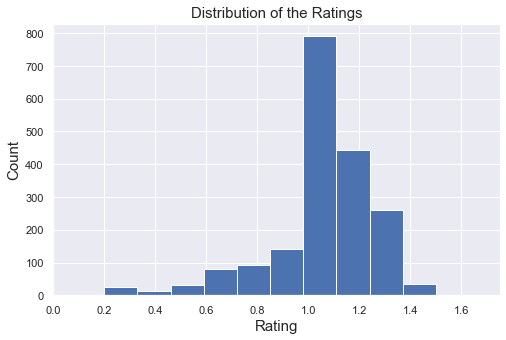

In [150]:
df.rating.plot(kind='hist', xlim=[0,1.75], figsize=(8,5))
plt.title('Distribution of the Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15);

The mean dog rating is 1.06.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


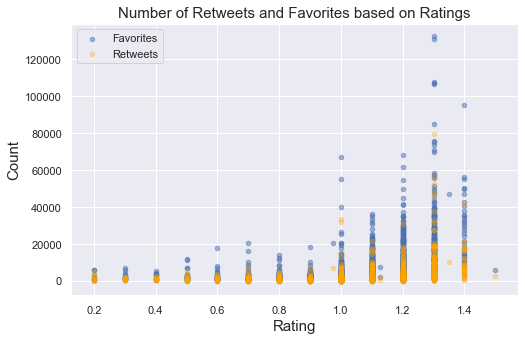

In [152]:
ax = df.plot.scatter(x='rating', y='favorite_count', alpha=0.5, label='Favorites');
df.plot.scatter(x='rating', y='retweet_count', color='Orange', alpha=0.3, label='Retweets', ax=ax, figsize=(8,5));
plt.title('Number of Retweets and Favorites based on Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15);

C:\Users\alizahran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


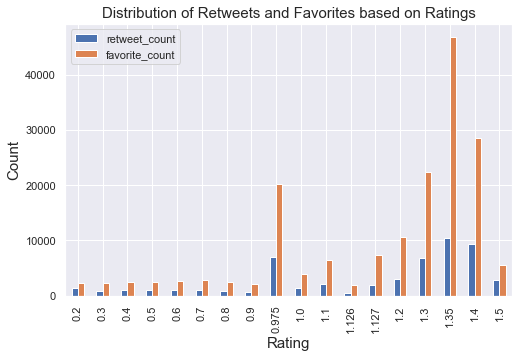

In [155]:
df.groupby('rating')[('retweet_count','favorite_count')].mean().plot(kind='bar', figsize=(8,5))
plt.title(('Distribution of Retweets and Favorites based on Ratings'), fontsize=15)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Count', fontsize=15);

- The favorite counts are higher than the retweet counts for each rating
- The dogs with the ratings between 1.3 and 1.4 are retweeted and liked most.


In [156]:
df[['rating','retweet_count','favorite_count']].corr(method = 'pearson')

,rating,retweet_count,favorite_count
rating,1.000000,0.318617,0.427382
retweet_count,0.318617,1.000000,0.913863
favorite_count,0.427382,0.913863,1.000000


Pearson correlation coefficients show that there is indeed a positive correlation between retweet counts and favorite counts.

In [158]:
df.dog_stage.value_counts()

None      1568
pupper    223 
doggo     70  
puppo     28  
floof     21  
Name: dog_stage, dtype: int64

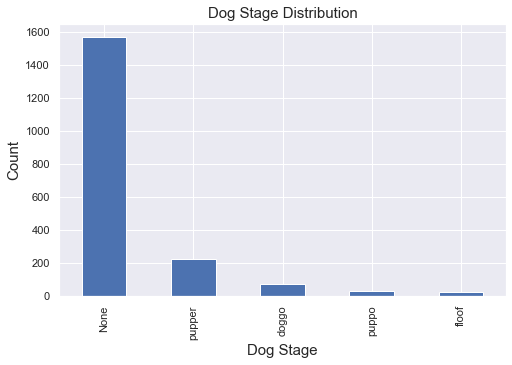

In [160]:
df.dog_stage.value_counts().plot(kind = 'bar', figsize=(8,5))
plt.title('Dog Stage Distribution', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15);

There are 1566 dogs with unknown dog stage. It is a very high number and more time should be spent on cleaning dog_stage part. For now, I will exclude the category 'None' and continue to analyze it.

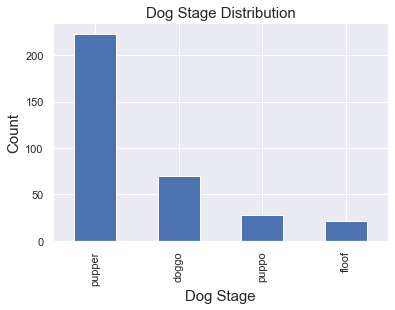

In [162]:
dog_stages=df.groupby('dog_stage').filter(lambda x: len(x) < 250)
dog_stages['dog_stage'].value_counts().plot(kind = 'bar')
plt.title('Dog Stage Distribution', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15);

Most of the dogs are pupper.

Text(0, 0.5, 'Avarage Rating')

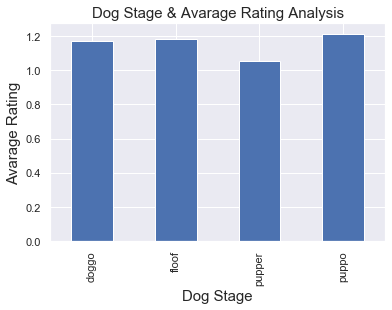

In [163]:
dog_stages.groupby('dog_stage')['rating'].mean().plot(kind='bar')
plt.title('Dog Stage & Avarage Rating Analysis', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel('Avarage Rating', fontsize=15)

The highest average rating is for puppos.

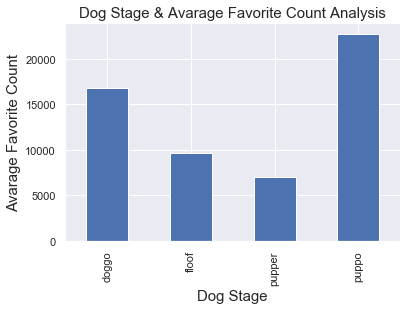

In [165]:
dog_stages.groupby('dog_stage')['favorite_count'].mean().plot(kind='bar')
plt.title('Dog Stage & Avarage Favorite Count Analysis', fontsize=15)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel('Avarage Favorite Count', fontsize=15);

The puppos has the highest favorite counts.

#### Conclusion

- The ratings, retweets and favorites are not only related with the dog images or videos,but also the humor of the account holder also affects the followers’ decisions.
- Most of the dogs, their stages are not stated in the tweets.
- Some tweets rate other things rather than dogs, I cleaned a significant amount of data but it was not that easy to clean all of them, that is why there are still very low ratings.
